# VISUALIZING FEATURES
# PCA, T-SNE and UMAP

In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Create Function

In [2]:
def compare_viz(data, labels, title, dct_pca, dct_tsne, dct_umap, dct_plot):
    
    x_pca = PCA(**dct_pca).fit_transform(data)
    x_tsne = TSNE(**dct_tsne).fit_transform(data)
    x_umap = UMAP(**dct_umap).fit_transform(data)
    
    fig, axes = plt.subplots(1,3, figsize=(18,5))
    fig.suptitle(title, fontsize=20)
    axes[0].scatter(x_pca[:,0], x_pca[:,1], c=labels, **dct_plot)
    axes[0].set_title('PCA')
    axes[1].scatter(x_tsne[:,0], x_tsne[:,1], c=labels, **dct_plot)
    axes[1].set_title('T-SNE')
    axes[2].scatter(x_umap[:,0], x_umap[:,1], c=labels, **dct_plot)
    axes[2].set_title('UMAP')
    plt.show()

## Set Parameters

In [3]:
pca_param = {'n_components':2}
plot_para ={'alpha':0.7, 'cmap':'viridis', 'edgecolors':'grey', 's':20}

In [4]:
plt.style.use('seaborn')

## Load Dataset

In [5]:
iris = load_iris()
digits = load_digits()
wine = load_wine()
breast = load_breast_cancer()

#mnist_x, mnist_y = fetch_openml('mnist_784', version=1, return_X_y=True)
#fmnist_x, fmnist_y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

### IRIS

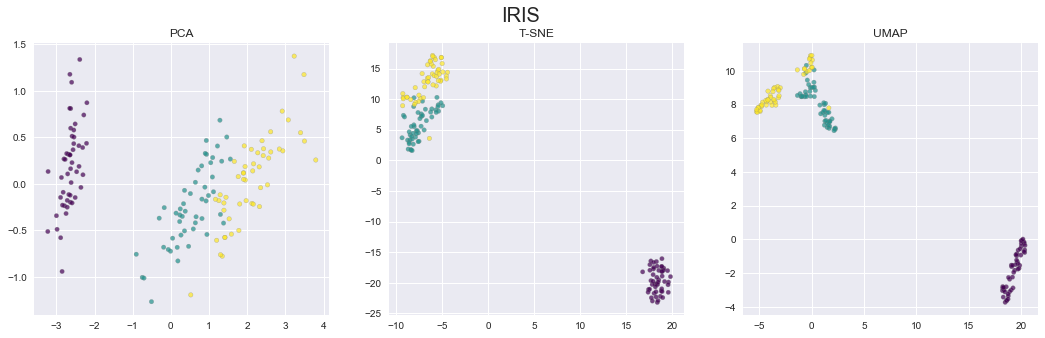

In [6]:
compare_viz(iris.data, iris.target, 'IRIS', pca_param, pca_param, pca_param, plot_para)

### DIGITS

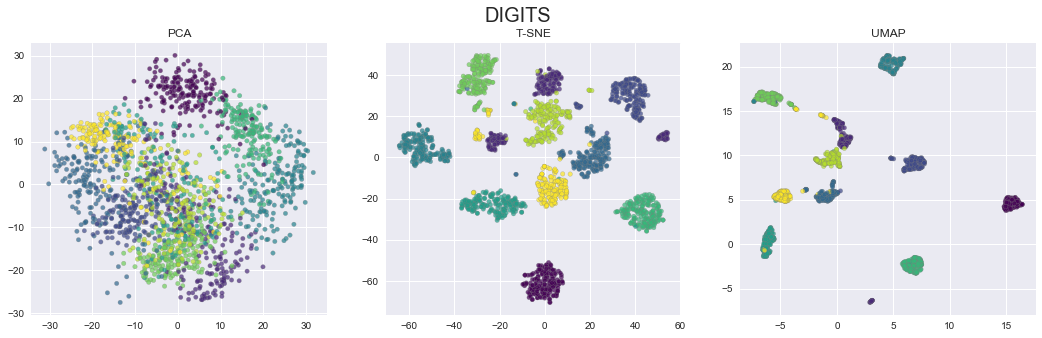

In [7]:
compare_viz(digits.data, digits.target, 'DIGITS', pca_param, pca_param, pca_param, plot_para)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

check whether umap produce consistent result for visualizing same class data

In [9]:
import matplotlib as mpl

In [10]:
train_umap = UMAP(n_components=2, random_state=42).fit_transform(X_train)
test_umap =  UMAP(n_components=2, random_state=42).fit_transform(X_test)

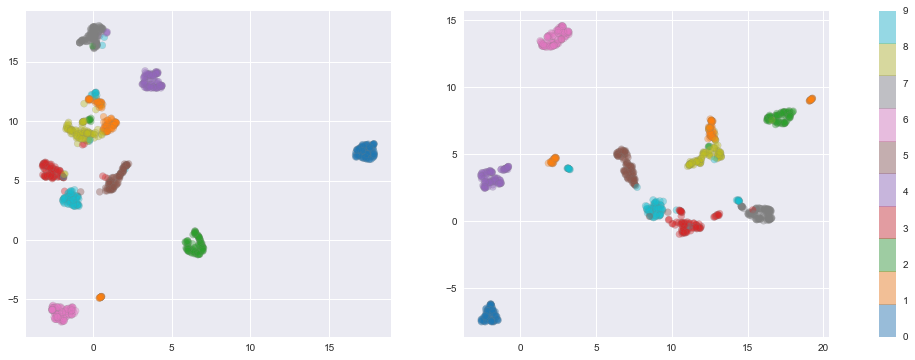

In [11]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
im = axes[0].scatter(train_umap[:,0],train_umap[:,1], c=y_train, cmap='tab10', alpha=.4, edgecolor='grey')
im = axes[1].scatter(test_umap[:,0],test_umap[:,1], c=y_test, cmap='tab10', alpha=.4, edgecolor='grey')

cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im, cax=cax, ticks=np.unique(y_train).astype(int))

plt.show()

### WINE

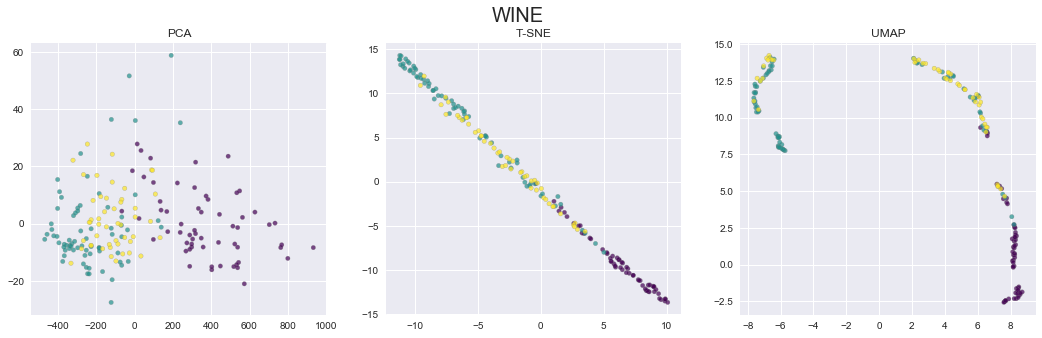

In [12]:
compare_viz(wine.data, wine.target, 'WINE', pca_param, pca_param, pca_param, plot_para)

### BREAST

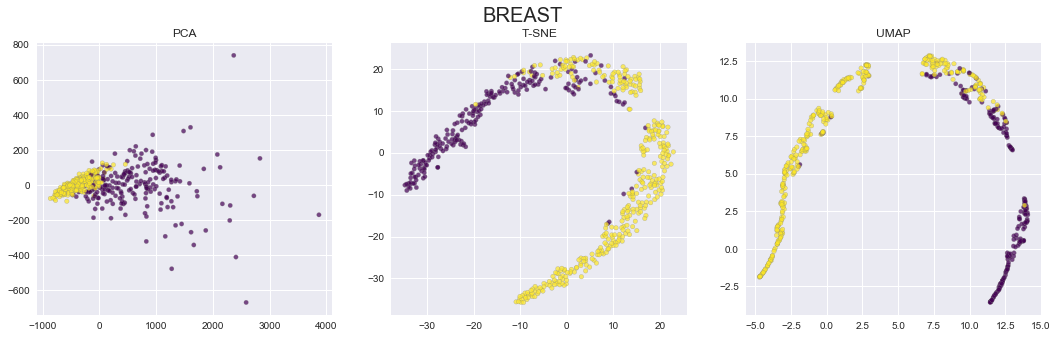

In [13]:
compare_viz(breast.data, breast.target, 'BREAST', pca_param, pca_param, pca_param, plot_para)

### MNIST

In [14]:
#compare_viz(mnist_x, mnist_y, 'MNIST', pca_param, pca_param, pca_param, plot_para)

### FASHION-MNIST

In [15]:
#compare_viz(fmnist_x, fmnist_y, 'FASHION-MNIST', pca_param, pca_param, pca_param, plot_para)